In [1]:
from functions import *
import numpy as np
import pandas as pd
from functions import *
from questions import *
from visualization import *
from models import *

In [2]:
%load_ext autoreload
%autoreload 2

Make pandas display everything

#show all rows
pd.set_option('display.max_rows', None)

#set the display option to show all columns
pd.set_option('display.max_columns', None)

#show the full width of each column
pd.set_option('display.max_colwidth', None)

# show the full width of the DataFrame
pd.set_option('display.width', None)

In [4]:
#From here and on, our script starts executing
dataframe1, dataframe2 = read_files()

In [5]:
#do a minor edit in df1 so as to have all split product codes saved as a set
dataframe1, dataframe2 = edit_dfs(dataframe1, dataframe2)

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Unnamed: 0', 'Reviews', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories'],
      dtype='object')


c:\Users\steve\Clio_Muse Data Analysis Project\functions.py:309: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)


In [6]:
#add profit to dataframe2
dataframe2 = add_df2_profit(dataframe1, dataframe2)

In [7]:
#which tours go together?
go_together = which_tours_go_together(dataframe1, dataframe2)

In [8]:
#how does a successful tour look like?
successful = successful_tour_looks_like(dataframe1, dataframe2)

In [9]:
#which tours do we recommend to a traveller?
which_tours_do_we_recommend_to_a_traveller(dataframe1, dataframe2, go_together)

In [10]:
save_to_excel(dataframe1, dataframe2)

In [11]:
from IPython.display import display
display(dataframe1.head(5))

,id,reference_code,travel_date,booking_date,booking_status,split_product_code,language,tours,product_title,product_type,product_country,seller_name,seller_id,month,task_id,channel,num_of_travellers,retail_price,net_price,product_code,stories,Country,Ticket Price,Profit,split_product_codes,booking_day,booking_hour,travel_day,travel_day_number,travel_month,number_of_stories,money_spent_per_traveller
0,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Audio Tour,Skip-the-Line,Italy,GetYourGuide,2.0,January,2023-01,B2B,2.0,58.00,NaN,STL284_288DE,Castel Sant’ Angelo: E-ticket + Rome City Tour,Italy,34.00,24.00,"{STL284, 288DE}",Tuesday,23,Thursday,travel_date,1,2,29.00
8,98826,GYG32NWHYK2Z,2023-01-03,2022-12-13 23:04:00,ACTIVE,STL526,English,526,Moorish Castle: Skip-The-Line e-ticket with Audio Tour,Skip-the-Line,Portugal,GetYourGuide,2.0,January,2023-01,B2B,3.0,54.00,NaN,STL526_539_537DE,Castelo dos Mouros + Quinta da Regaleira + Sintra City Tour,Portugal,35.00,19.00,"{STL526, 539, 537DE}",Tuesday,23,Tuesday,travel_date,1,3,18.00
18,98828,GYGMX57A5K6H,2023-01-03,2022-12-13 23:06:00,ACTIVE,STL539,Spanish,539,Quinta da Regaleira: Skip-The-Line e-ticket with Audio Tour - Spanish,Skip-the-Line,Portugal,GetYourGuide,2.0,January,2023-01,B2B,2.0,42.00,NaN,STL539_537EN,Quinta da Regaleira + Sintra City Tour,Portugal,26.00,16.00,"{537EN, STL539}",Tuesday,23,Tuesday,travel_date,1,2,21.00
26,98855,GYG83Y54QLYF,2023-01-07,2022-12-14 11:02:00,ACTIVE,STL55,Italian,55,National Archaeological Museum: Skip-The-Line e-ticket with Audio Tour - Italian,Skip-the-Line,Greece,GetYourGuide,2.0,January,2023-01,B2B,3.0,42.00,NaN,STL55_447DE,NAM & Athens City Tour,Greece,16.00,26.00,"{STL55, 447DE}",Wednesday,11,Saturday,travel_date,1,2,14.00
39,98877,GYG2RA8L48HY,2023-01-18,2022-12-15 07:34:00,ACTIVE,AU226,English,226,Heraklion: the Castle of the Moat,Audio,Greece,GetYourGuide,2.0,January,2023-01,B2B,2.0,19.98,NaN,AU226DE,Heraklion: the Castle of the Moat,Greece,9.99,9.99,{AU226DE},Thursday,7,Wednesday,travel_date,1,1,9.99


In [12]:
dataframe2.head(5)

,Practical Information,Product Code and Name,Unnamed: 2,Qualitative Information - Findings,Unnamed: 4,Unnamed: 5,Experience,month,Product Code,Name of Product,split_product_code,Country,language,split_product_codes,Standardized_Experience,number_of_stories,Profit
0,Important Information,Name of Product Reviewed,Review,Content,Technology,Customer Support,Overall Experience,January,Name of Product Reviewed,None,Name of Product Reviewed,NaN,NaN,{Name of Product Reviewed},NaN,1,NaN
1,False,STL55 | Athens National Archaeological Museum Ticket with Audio Tour,"Without the Audio Guide I would not have understood a lot of this. Since I do not speak or read Greek, the Audio Guide is really highly recommended. Although not every piece in the museum is explained, the information was enough for me. Handling downloads and playback is usually simple. However, I would book the tour two days in advance, as you have to download an app for the audio file. I also recommend good headphones.",NaN,NaN,NaN,Excellent (5 stars),January,STL55,Athens National Archaeological Museum Ticket with Audio Tour,STL55,NaN,NaN,{STL55},5,1,26.0
2,False,TO240_181_51_459 | Acropolis & 6 Archaeological Sites Combo Ticket,"I liked it a lot, you know different things about the city as well as including the tickets to the typical tourist attractions of Athens. The only thing I find is that in such typical monuments you do not have a short audio guide, although there are other audio guides more specific for each particular monument. . . an introduction or short explanation would not be wrong.",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,English,"{TO240, 51, 181, 459}",4,4,12.0
8,False,TO240_181_51_459 | Acropolis & 6 Archaeological Sites Combo Ticket,"I liked it a lot, you know different things about the city as well as including the tickets to the typical tourist attractions of Athens. The only thing I find is that in such typical monuments you do not have a short audio guide, although there are other audio guides more specific for each particular monument. . . an introduction or short explanation would not be wrong.",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Spanish,"{TO240, 51, 181, 459}",4,4,12.0
60,False,TO240_181_51_459 | Acropolis & 6 Archaeological Sites Combo Ticket,"I liked it a lot, you know different things about the city as well as including the tickets to the typical tourist attractions of Athens. The only thing I find is that in such typical monuments you do not have a short audio guide, although there are other audio guides more specific for each particular monument. . . an introduction or short explanation would not be wrong.",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Italian,"{TO240, 51, 181, 459}",4,4,12.0


c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

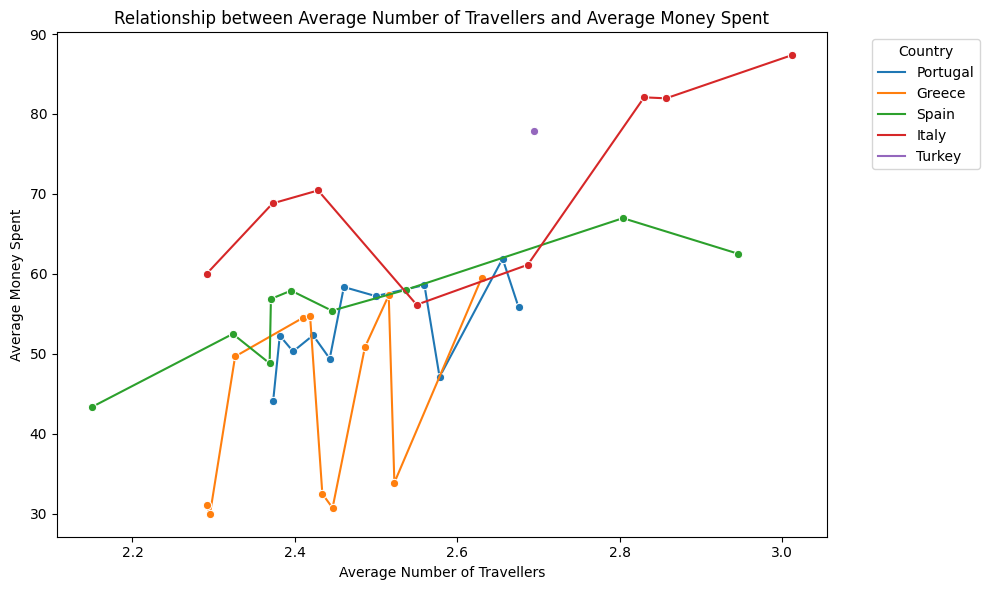

In [13]:
travellers_vs_spending(dataframe1)


Note: The average number of travellers per country changes depending on the month.

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


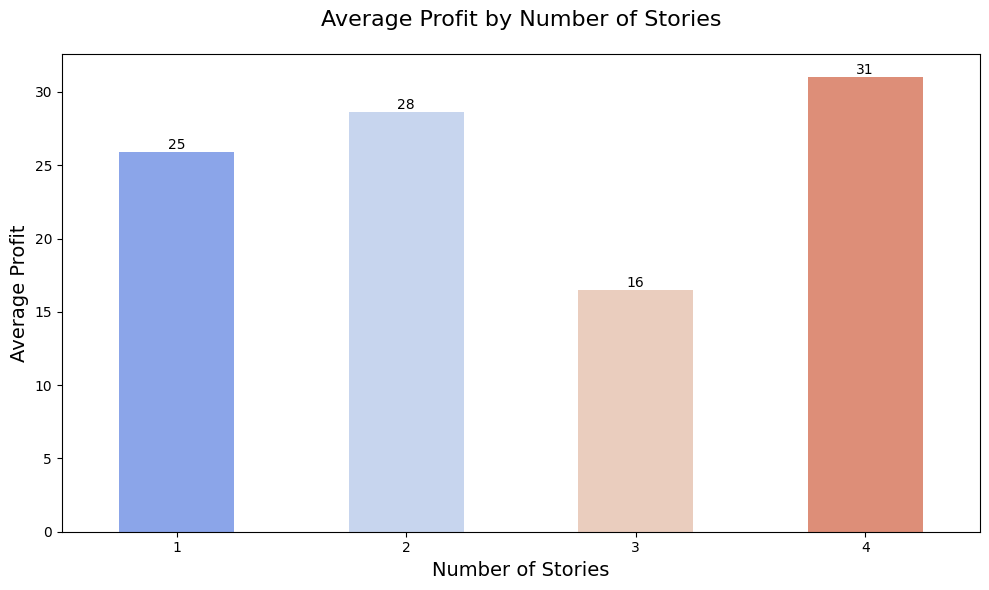

,Number of Stories,Average Profit
0,1,25.926304
1,2,28.611188
2,3,16.465882
3,4,31.048301


In [14]:
optimum_number_of_stories_profit(dataframe1)

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


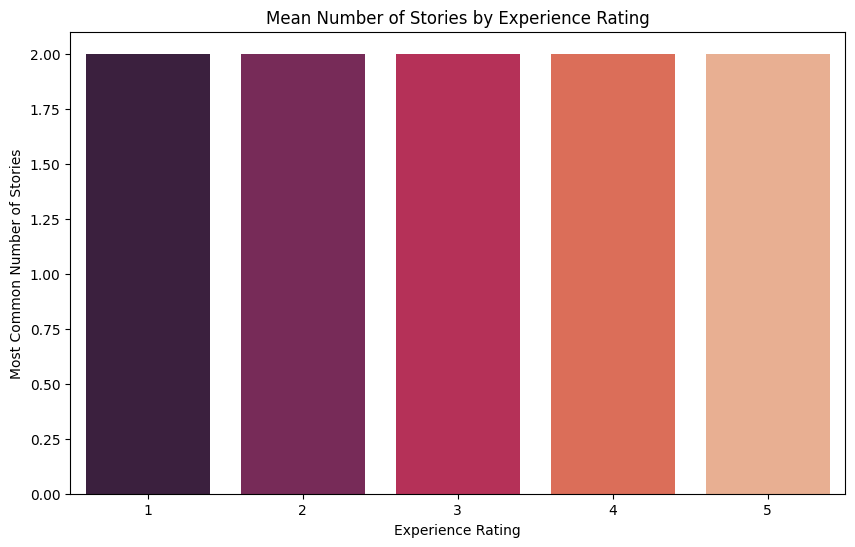

In [15]:
optimum_number_of_stories_liked(dataframe2)

We can see that the most common number of stories per booking is 2, regardless of user experience.
We can deduct that it is better to strive for 2 stories then.

In [16]:
dataframe1.columns

Index(['id', 'reference_code', 'travel_date', 'booking_date', 'booking_status',
       'split_product_code', 'language', 'tours', 'product_title',
       'product_type', 'product_country', 'seller_name', 'seller_id', 'month',
       'task_id', 'channel', 'num_of_travellers', 'retail_price', 'net_price',
       'product_code', 'stories', 'Country', 'Ticket Price', 'Profit',
       'split_product_codes', 'booking_day', 'booking_hour', 'travel_day',
       'travel_day_number', 'travel_month', 'number_of_stories',
       'money_spent_per_traveller'],
      dtype='object')

In [17]:
dataframe2.columns

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories', 'Profit'],
      dtype='object')

Let us run an association rules algorithm, to get a better idea of which tours go together


In [18]:
frequent_tours, rules = find_frequent_product_combinations(dataframe1)

Most frequent itemsets;

In [19]:
frequent_tours

,support,itemsets
25,0.189757,(STL539)
12,0.121575,(537DE)
60,0.108131,"(537DE, STL539)"
34,0.104738,(TO539DE)
6,0.092510,(490DE)
0,0.088796,(181)
9,0.083099,(51)
38,0.083099,"(51, 181)"
52,0.082138,"(51, TO240)"
68,0.082138,"(51, 181, TO240)"


The most frequent itemsets are;

In [20]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
73,"(459DE, 181, TO240)",(51),0.054802,0.083099,0.054802,1.000000,12.033898,0.050248,inf,0.970062
105,"(51, 181, 278DE)",(TO240),0.027337,0.082138,0.027337,1.000000,12.174591,0.025091,inf,0.943658
116,"(181, 278DE)",(TO240),0.027337,0.082138,0.027337,1.000000,12.174591,0.025091,inf,0.943658
115,(278DE),(181),0.027337,0.088796,0.027337,1.000000,11.261716,0.024909,inf,0.936813
114,(278DE),"(51, TO240)",0.027337,0.082138,0.027337,1.000000,12.174591,0.025091,inf,0.943658
113,"(TO240, 278DE)",(51),0.027337,0.083099,0.027337,1.000000,12.033898,0.025065,inf,0.942671
112,"(51, 278DE)",(TO240),0.027337,0.082138,0.027337,1.000000,12.174591,0.025091,inf,0.943658
111,(278DE),"(51, 181, TO240)",0.027337,0.082138,0.027337,1.000000,12.174591,0.025091,inf,0.943658
110,"(TO240, 278DE)","(51, 181)",0.027337,0.083099,0.027337,1.000000,12.033898,0.025065,inf,0.942671
109,"(181, 278DE)","(51, TO240)",0.027337,0.082138,0.027337,1.000000,12.174591,0.025091,inf,0.943658


Create  a product code to product title mapping for dataframe1.

In [26]:
product_code_to_title = dict(zip(dataframe1['product_code'], dataframe1['product_title']))

In [25]:
associate_together(dataframe1, product_code_to_title)

NameError: name 'product_code_to_title' is not defined